2.1 Exercise - 1:

1 Read and display the image.

• Read the image using the Pillow library and display it.

• You can also use matplotlib to display the image

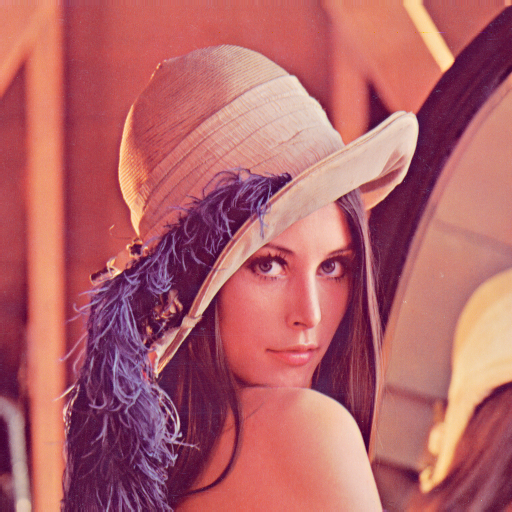

In [1]:
from PIL import Image
import numpy as np

#  display image in colab
image_colored = Image.open("/content/drive/MyDrive/Wps1_img/lenna.png")
display(image_colored)


2. Display only the top left corner of 100x100 pixels.

• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

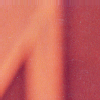

In [2]:
# Convert the Pillow image to a NumPy array
image_array_colored = np.array(image_colored)
# Display the shape of the NumPy array (height , width ,channels )
# Extract the top-left corner (100x100 pixels)
top_left_corner = image_array_colored[:100, :100]

# Convert back to PIL Image and display
cropped_image = Image.fromarray(top_left_corner)
display(cropped_image)


3. Show the three color channels (R, G, B).

• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}


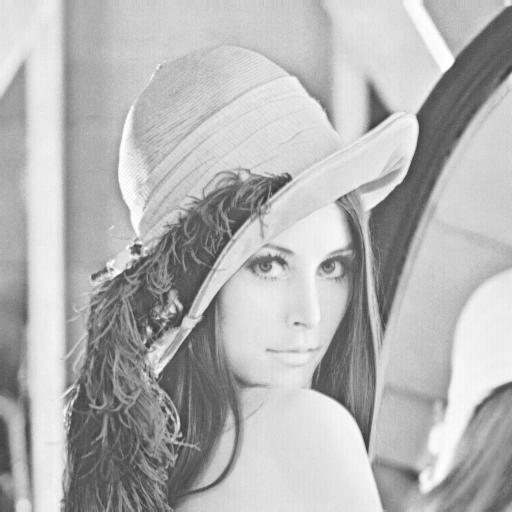

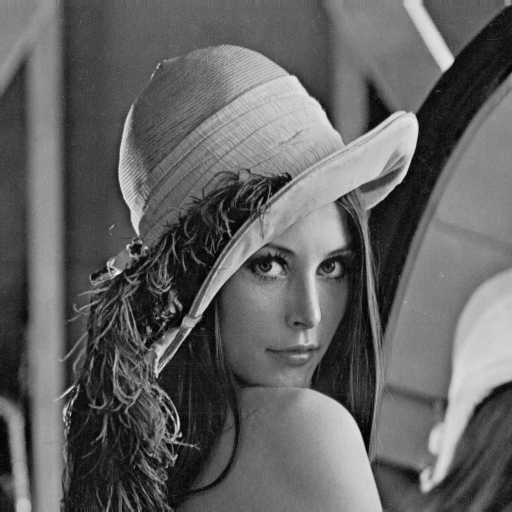

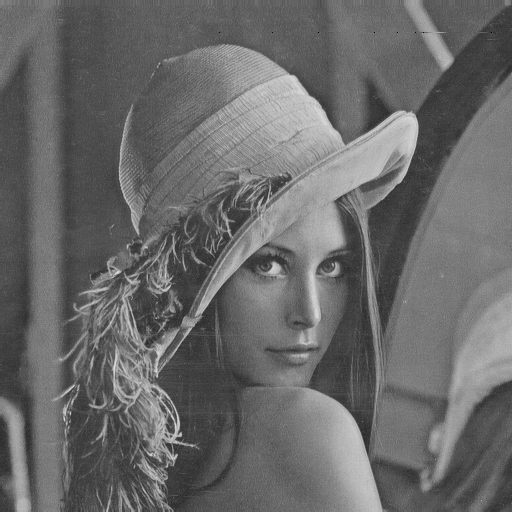

In [3]:
red = image_array_colored[:, :, 0]
green = image_array_colored[:, :, 1]
blue = image_array_colored[:, :, 2]
#display(red)
#display(green)
#display(blue)
r,g,b = image_colored.split()
# Display or further process the individual channels
display(r)
display(g)
display(b)



4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.


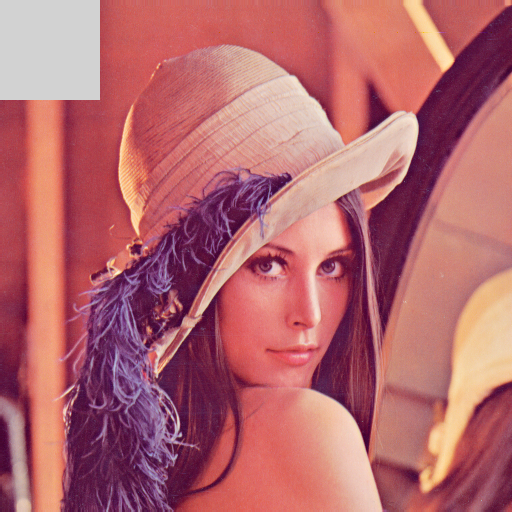

In [4]:
image_array_colored[:100,:100] = [210,210,210]
modified_image = Image.fromarray(image_array_colored)
display(modified_image)

2.2   Exercise - 2:


1 Load and display a grayscale image.

• Load a grayscale image using the Pillow library.

• Display the grayscale image using matplotlib.

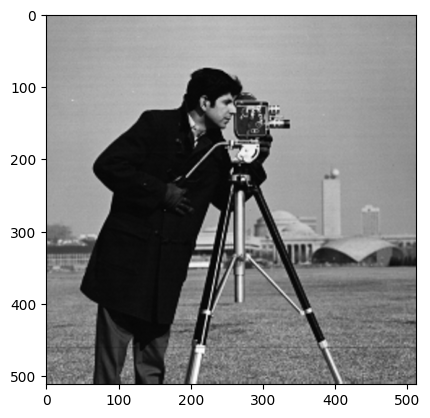

In [5]:
import matplotlib.pyplot as plt
#  display image in colab
gray_image = Image.open("/content/drive/MyDrive/Wps1_img/cameraman.png")
plt.imshow(gray_image,cmap = 'gray')


2. Extract and display the middle section of the image (150 pixels).

• Extract a 150 pixel section from the center of the image using NumPy array slicing.

• Display this cropped image using matplotlib.

In [6]:
img_np = np.array(gray_image)
height, width = gray_image.size

center_x = width // 2
center_y = height // 2
start_x = center_x - 75  # 75 pixels on each side of the center
end_x = center_x + 75
start_y = center_y - 75
end_y = center_y + 75

# Extract the middle section using array slicing
middle_section = img_np[start_y:end_y, start_x:end_x]


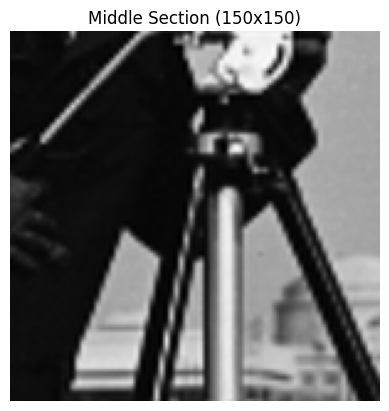

In [7]:
plt.imshow(middle_section, cmap='gray')  # Use cmap='gray' for grayscale image
plt.title('Middle Section (150x150)')
plt.axis('off')
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).

• Display the resulting binary image.

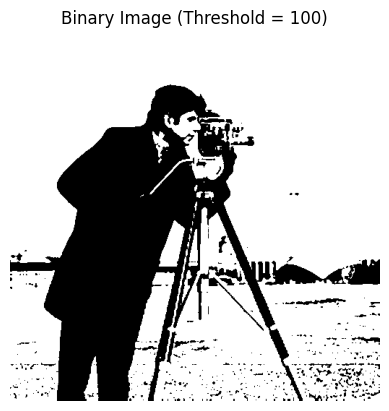

In [8]:
# Apply threshold
threshold_value = 100
binary_image = np.where(img_np < threshold_value, 0, 255)

# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image (Threshold = {})'.format(threshold_value))
plt.axis('off')
plt.show()

4 Rotate the image 90 degrees clockwise and display the result.

• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating the image array.

• Display the rotated image using matplotlib.

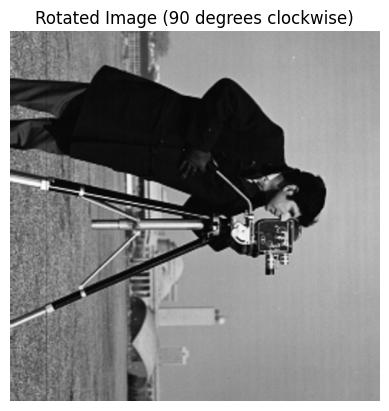

In [9]:
# Rotate the image 90 degrees clockwise
rotated_img = gray_image.rotate(-90)

# Display the rotated image
plt.imshow(rotated_img, cmap='gray')
plt.title('Rotated Image (90 degrees clockwise)')
plt.axis('off')
plt.show()

Convert the grayscale image to an RGB image.

• Convert the grayscale image into an RGB image where the grayscale values are replicated across all three channels (R, G, and B).

• Display the converted RGB image using matplotlib.

(512, 512, 3)


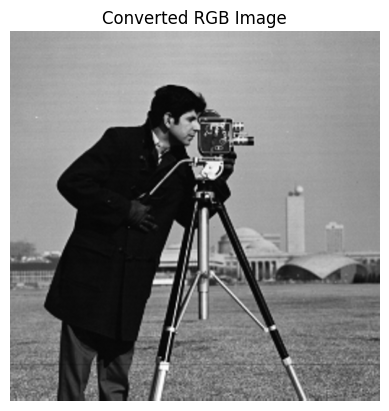

In [10]:


# Stack the grayscale image to create an RGB image
rgb_img_np = np.stack((img_np,)*3, axis=-1)
print(rgb_img_np.shape)

# Display the converted RGB image
plt.imshow(rgb_img_np)
plt.title('Converted RGB Image')
plt.axis('off')
plt.show()

3 Image Compression and Decompression using PCA.
Load and Prepare Data:
• Fetch an image of you choice.{If colour convert to grayscale}

• Center the dataset - Standaridze the Data.

• Calculate the covaraince matrix of the Standaridze data.

In [11]:
# Convert to NumPy array
image_array = np.array(gray_image)
# Get image dimensions
height, width = image_array.shape
# Reshape the image into a 2D array where each row represents a row of pixels
# This allows PCA to process each row as an observation and find patterns across pixel intensities
data = image_array.reshape( height , width )


# Compute the mean of each column ( feature )
mean = np.mean( data , axis =0)
# Subtract mean to center the data
centered_data = data - mean

# Compute covariance matrix
cov_matrix = np.cov( centered_data , rowvar = False )
print(cov_matrix)

[[543.51861775 520.97947881 492.56189228 ... 452.37668175 465.56655914
  469.92323569]
 [520.97947881 515.55188585 504.98165744 ... 438.16924535 451.13798771
  455.28722786]
 [492.56189228 504.98165744 514.61175621 ... 415.396557   428.0037075
  431.84547762]
 ...
 [452.37668175 438.16924535 415.396557   ... 694.40484344 701.46153376
  705.1383317 ]
 [465.56655914 451.13798771 428.0037075  ... 701.46153376 724.80795927
  732.40163283]
 [469.92323569 455.28722786 431.84547762 ... 705.1383317  732.40163283
  741.0831091 ]]


3. Eigen Decomposition and Identifying Principal Components:
• Compute Eigen Values and Eigen Vectors.

• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues.

• Identify the Principal Components with the help of cumulative Sum plot.


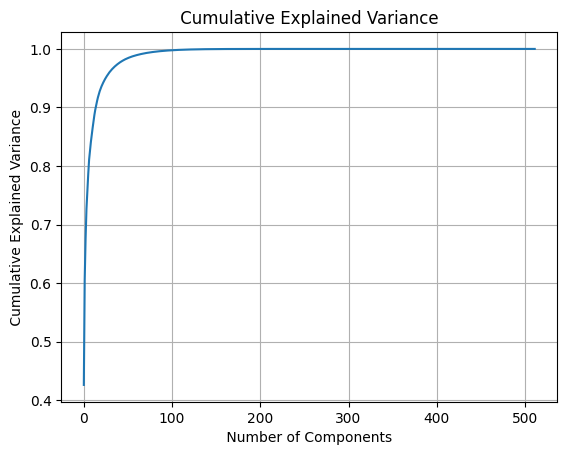

In [12]:
# Compute eigenvalues and eigenvectors
eigenvalues , eigenvectors = np.linalg.eigh( cov_matrix )
# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np . argsort ( eigenvalues ) [:: -1]
eigenvalues = eigenvalues [ sorted_indices ]
eigenvectors = eigenvectors [: , sorted_indices]



# Plot the explained variance ratio
explained_variance_ratio = eigenvalues / np .sum ( eigenvalues )
plt . plot ( np . cumsum ( explained_variance_ratio ) )
plt . title (" Cumulative Explained Variance ")
plt . xlabel (" Number of Components ")
plt . ylabel (" Cumulative Explained Variance ")
plt . grid ( True )
plt . show ()

In [13]:
k = 20 # Choose k principal components
components = eigenvectors [: , : k ]

Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec- tors(PCs) to obtain a lower-dimensional representation.


• Experiments: Pick Four different combination of principal components with various ex- plained variance value and compare the result.


• Display the Results and Evaluate.

In [14]:
# Project the data onto the principal components
compressed_data = np.dot(centered_data, components)
print(compressed_data.shape)

# Reconstruct the image from compressed data
decompressed_data = np.dot( compressed_data , components . T ) + mean

(512, 20)


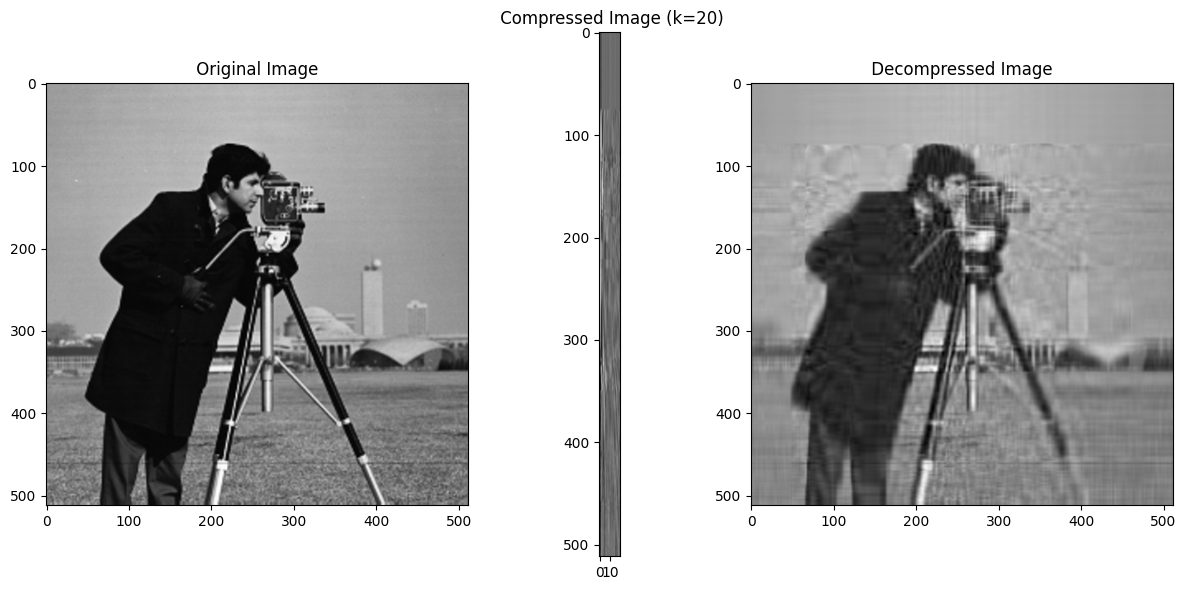

In [16]:
plt.figure ( figsize =(12 , 6) )

# Original Image
plt.subplot (1 , 3 , 1)
plt . imshow ( gray_image, cmap="gray" )
plt . title (" Original Image ")

# Compressed Representation
plt . subplot (1 , 3 , 2)
plt . imshow ( compressed_data,  cmap="gray")
plt . title ( f" Compressed Image (k={k})")
# Decompressed Image
plt . subplot (1 , 3 , 3)
plt . imshow ( decompressed_data,  cmap="gray")
plt . title (" Decompressed Image ")
plt . tight_layout ()
plt . show ()

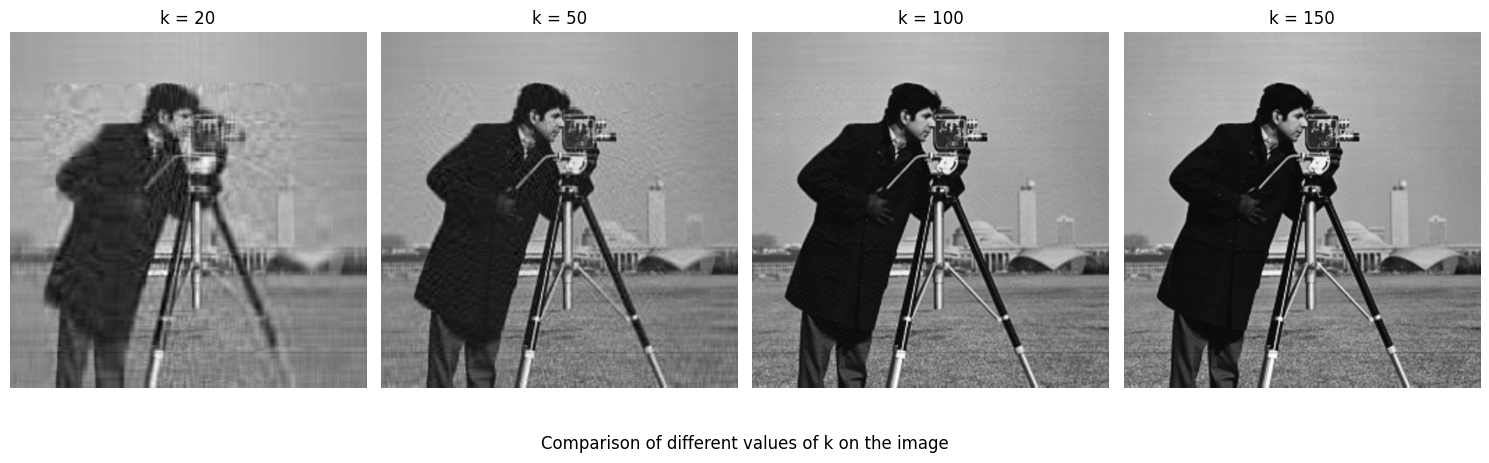

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def compress_and_reconstruct(image_array, k):
    """Compresses and reconstructs an image using PCA with k components."""
    height, width = image_array.shape
    data = image_array.reshape(height, width)
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    cov_matrix = np.cov(centered_data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    components = eigenvectors[:, :k]
    compressed_data = np.dot(centered_data, components)
    decompressed_data = np.dot(compressed_data, components.T) + mean
    return decompressed_data

image_array = np.array(gray_image)
k_values = [20, 50, 100, 150]  # Different values of k

# Create subplots for each k value
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))

for i, k in enumerate(k_values):
    reconstructed_image = compress_and_reconstruct(image_array, k)
    axes[i].imshow(reconstructed_image, cmap='gray')
    axes[i].set_title(f'k = {k}')
    axes[i].axis('off')

plt.tight_layout()
fig.suptitle("Comparison of different values of k on the image", y=0.05)
plt.show()

In PCA, k, the number of principal components, determines the level of image compression and the percentage of image quality retained. Based on the plot observations, we can summarize the effect of changing k as follows:

k = 20

The reconstructed image is significantly blurred.
Fine details and textures are largely lost.
This is high compression at the cost of poor visual quality.

k = 50

Visual quality is superior to k = 20.
Some edges and features can be seen, though finer details are still not present.
This is a moderate compression level with reasonable quality.

k = 100

Reconstructed image closely resembles the original.
Most of the significant details and textures are retained.
This is a good trade-off between compression and visual quality.

k = 150

The image is quite close to the original.
There is little loss of quality.
This is low compression but high reconstruction quality.

**#
Key Insights**

A smaller k gives more compression but at the expense of poorer image quality.
A larger k retains more image detail at the expense of compression ratio.
The optimal value of k is application-dependent—whether storage space is to be emphasized or visual fidelity.
For the given image, k = 100 appears to keep most of the quality while still achieving compression.
This shows the fundamental trade-off in PCA-based image compression between data reduction and reconstruction accuracy.